# Market Response
This notebook tries to see how global markets respond to local shortages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import remove_f_years

## Loading the datasets
Loads the datasets into panda dataframes

In [2]:
df_trade_matrix = pd.read_csv('../data/Trade_DetailedTradeMatrix_E_All_Data.csv', encoding = 'ISO-8859-1')

/Users/Niels/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Great Australian Banana Shortage of 2011

In [3]:
df_clean = remove_f_years(df_trade_matrix)

In [23]:
def total_trade(df, country, item, unit='tonnes', reporter=True):
    df = df[df['Item'] == item]
    df = df[df['Unit'] == unit].fillna(value=0)
    if reporter:
        df = df[df['Reporter Countries']== country]
        df_import = df[df['Element'] == 'Import Quantity']
        df_export = df[df['Element'] == 'Export Quantity']
    else:
        df = df[df['Partner Countries'] == country]
        df_import = df[df['Element'] == 'Export Quantity']
        df_export = df[df['Element'] == 'Import Quantity']
    df_import = df_import[[f'Y{label}' for label in range(1986, 2017)]].sum(axis=0)
    df_export = df_export[[f'Y{label}' for label in range(1986, 2017)]].sum(axis=0)        
    return df_import, df_export

In [31]:
df_import, df_export = total_trade(df_clean, 'Australia', 'Bananas')

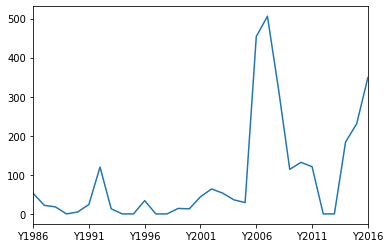

In [25]:
df_import.plot()

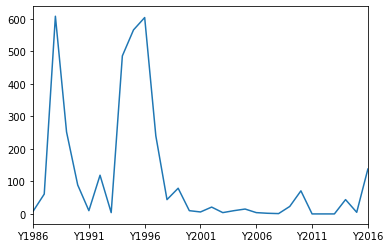

In [26]:
df_export.plot()

In [27]:
df_import, df_export = total_trade(df_clean, 'Australia', 'Bananas', reporter=False)

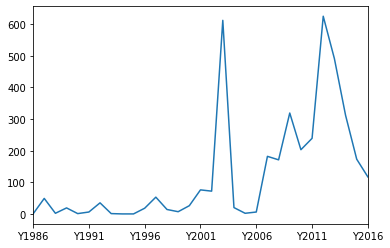

In [28]:
df_import.plot()

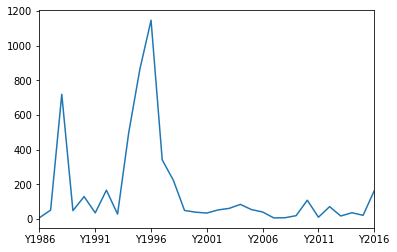

In [29]:
df_export.plot()